# Team Member:
BinXu

LiangMeng

JingLi

# Project description
This project is mean to predict stock price for different companies. We are going to create a model based on machine learning algorithm which can be used to predict future stock price based on the past dataset. In the dataset we have 7 columns data---“Date”, “Open”, “High”, “Low”, “Close”, “Adj Close” and “Volume”. We will use TensorFlow to build our model and apply 4 columns data as our input---“Date”, “Open”, “High” and “Adj Close”. “Adj Close” is the actual stock close price and it is our aimed prediction value. We will use our model to predict the relationship of time and stock close price, in other words to predict the stock trends.

## MLP-Linear Regression  AAPL comparing with the result of BOEING DATA & ALIBABA DATA


In [3]:
from pandas_datareader import data 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
from datetime import date 
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt 
from keras.layers.recurrent import LSTM
from sklearn.linear_model import LinearRegression 
from sklearn.neural_network import MLPRegressor 

Using TensorFlow backend.


In [4]:
#GET RAW DATA OF STOCK 
start=date(2012,1,3)
end=date(2016,12,31)
apple=data.DataReader("AAPL","yahoo",start,end)

N_data=len(apple)
N_train=int(0.8*N_data)
X_train=apple.iloc[0:N_train,:]
X_test=apple.iloc[N_train+1:N_data-1,:]

print(X_train)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   58.485714   58.928570   58.428570   58.747143   52.662899   
2012-01-04   58.571430   59.240002   58.468571   59.062859   52.945919   
2012-01-05   59.278572   59.792858   58.952858   59.718571   53.533730   
2012-01-06   59.967144   60.392857   59.888573   60.342857   54.093361   
2012-01-09   60.785713   61.107143   60.192856   60.247143   54.007557   
2012-01-10   60.844284   60.857143   60.214287   60.462856   54.200932   
2012-01-11   60.382858   60.407143   59.901428   60.364285   54.112568   
2012-01-12   60.325714   60.414288   59.821430   60.198570   53.964020   
2012-01-13   59.957142   60.064285   59.808571   59.972858   53.761677   
2012-01-17   60.599998   60.855713   60.422855   60.671429   54.387897   
2012-01-18   60.994286   61.352856   60.900002   61.301430   54.952656   
2012-01-19   61.450001   61.624287   6

## description of the data set 
Frist ,downloading the stock price data from yahoo website and setting up the range of date from 2012，1，3 to 2016,12,31. Then we split the whole data to be training data and test data. It may be reasonable that there should not be overlap between training and testing. Determining 80% of the raw data as training data. As the data detail present above, the raw data of training contain the historical stock price from 2012/01/03 to 2015/12/31, roughly present the 80% of raw data.


In [5]:
#PRESENT 5 DATA SAMPLES
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,52.662899,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,52.945919,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,53.533730,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,54.093361,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,54.007557,98506100


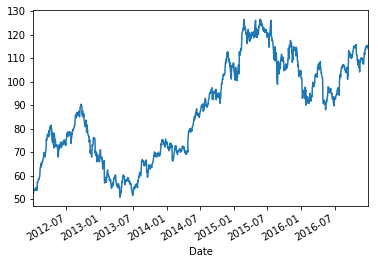

In [6]:
#PLOT CLOSE PRICE OF RAW DATA 
apple['2012':'2016']['Adj Close'].plot()
plt.show()

The main idea for out project its to use different algorithms to represent the adj close value for the test data which is also means the future data cause the newwork have not trained the test data.

In [7]:
#PREPROCESSING DATA 
index=apple.index
win=5 
N_AdjClose=['AdjClose-4','AdjClose-3','AdjClose-2','AdjClose-1','AdjClose-0','AdjClose+1']
N_Low=['Low-4','Low-3','Low-2','Low-1','Low-0']
N_High=['High-4','High-3','High-2','High-1','High-0']
N_Open=['Open-4','Open-3','Open-2','Open-1','Open-0']

zeros_cl=np.zeros((len(apple)-(win+1),win+1))
df_cl=pd.DataFrame(zeros_cl,columns=N_AdjClose,index=index[win:len(index)-1])

zeros_lo=np.zeros((len(apple)-(win),win))
df_lo=pd.DataFrame(zeros_lo,columns=N_Low,index=index[win:len(index)])

zeros_hi=np.zeros((len(apple)-win,win))
df_hi=pd.DataFrame(zeros_hi,columns=N_High,index=index[win:len(index)])

zeros_op=np.zeros((len(apple)-(win),win))
df_op=pd.DataFrame(zeros_op,columns=N_Open,index=index[win:len(index)])

In [8]:
for d in range (win+1,len(index)):
    p_op=apple['Open'][index[d-win:d]]
    df_op.iloc[d-win,:]=p_op.values.reshape(-1)
    
    p_lo=apple['Low'][index[d-win:d]]
    df_lo.iloc[d-win,:]=p_lo.values.reshape(-1) 
    
    p_hi=apple['High'][index[d-win:d]]
    df_hi.iloc[d-win,:]=p_hi.values.reshape(-1) 
    
    p_cl=apple['Adj Close'][index[d-(win+1):d]]
    df_cl.iloc[d-(win+1),:]=p_cl.values.reshape(-1)
    
df = pd.concat([df_op,df_hi,df_lo,df_cl])
p_op


Date
2016-12-22    116.349998
2016-12-23    115.589996
2016-12-27    116.519997
2016-12-28    117.519997
2016-12-29    116.449997
Name: Open, dtype: float64

In [8]:
#df

In [9]:
# Fill missing Values
df.fillna(df.mean(), inplace=True)

,AdjClose+1,AdjClose-0,AdjClose-1,AdjClose-2,AdjClose-3,AdjClose-4,High-0,High-1,High-2,High-3,...,Low-0,Low-1,Low-2,Low-3,Low-4,Open-0,Open-1,Open-2,Open-3,Open-4
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-10,87.948632,87.900009,87.851432,87.802015,87.752710,87.703359,94.26838,94.223685,94.177694,94.131399,...,92.526055,92.481197,92.436256,92.390336,92.344749,0.000000,0.000000,0.000000,0.000000,0.000000
2012-01-11,87.948632,87.900009,87.851432,87.802015,87.752710,87.703359,94.26838,94.223685,94.177694,94.131399,...,92.526055,92.481197,92.436256,92.390336,92.344749,60.844284,60.785713,59.967144,59.278572,58.571430
2012-01-12,87.948632,87.900009,87.851432,87.802015,87.752710,87.703359,94.26838,94.223685,94.177694,94.131399,...,92.526055,92.481197,92.436256,92.390336,92.344749,60.382858,60.844284,60.785713,59.967144,59.278572
2012-01-13,87.948632,87.900009,87.851432,87.802015,87.752710,87.703359,94.26838,94.223685,94.177694,94.131399,...,92.526055,92.481197,92.436256,92.390336,92.344749,60.325714,60.382858,60.844284,60.785713,59.967144
2012-01-17,87.948632,87.900009,87.851432,87.802015,87.752710,87.703359,94.26838,94.223685,94.177694,94.131399,...,92.526055,92.481197,92.436256,92.390336,92.344749,59.957142,60.325714,60.382858,60.844284,60.785713
2012-01-18,87.948632,87.900009,87.851432,87.802015,87.752710,87.703359,94.26838,94.223685,94.177694,94.131399,...,92.526055,92.481197,92.436256,92.390336,92.344749,60.599998,59.957142,60.325714,60.382858,60.844284
2012-01-19,87.948632,87.900009,87.851432,87.802015,87.752710,87.703359,94.26838,94.223685,94.177694,94.131399,...,92.526055,92.481197,92.436256,92.390336,92.344749,60.994286,60.599998,59.957142,60.325714,60.382858
2012-01-20,87.948632,87.900009,87.851432,87.802015,87.752710,87.703359,94.26838,94.223685,94.177694,94.131399,...,92.526055,92.481197,92.436256,92.390336,92.344749,61.450001,60.994286,60.599998,59.957142,60.325714
2012-01-23,87.948632,87.900009,87.851432,87.802015,87.752710,87.703359,94.26838,94.223685,94.177694,94.131399,...,92.526055,92.481197,92.436256,92.390336,92.344749,61.070000,61.450001,60.994286,60.599998,59.957142


## description of the data set 
The raw data have lot of different attributes: Open High Low Close Volume and the real value label : ADJ Close. So we can learning the relationship between this kind of the attribute and ADJ Close value. Obviously, MLP and linear regression is a good way to approach this hypothesis. 
MLP(multiple ) is a base model of artificial neural network: Artificial neural networks (ANNs) or connectionist systems are computing systems inspired by the biological neural networks that constitute animal brains. Such systems learn (progressively improve performance on) tasks by considering examples, generally without task-specific programming. 
So if most of the dimension have a contribution to the value of ADJ Close price then the neural network can effectively learn and predict the ADJ Close price depend on the attribute when we calculate the testing data.
As the pre procedure of the raw data, we create three more attribute for each original attribute， and as the creation procedure present， There are strong correlation between each attribute. So each epoch of training， the learning machine can learning how to represent the ADJ close depend on those attribute.


In [ ]:
# Prepare input and target
X= df.drop(['AdjClose+1'],axis=1)
y=df['AdjClose+1']
N_data=len(X)
N_train=int(0.8*N_data)
N_train


In [11]:
N_test=N_data-N_train
N_test

1003

In [12]:
#SPLIT TEST AND TRAIN DATA 
X_train=X.iloc[0:N_train,:]
X_test=X.iloc[N_train+1:N_data-1,:]

y_train=y.iloc[0:N_train]
y_test=y.iloc[N_train+1:N_data-1]
print(X_test)

            AdjClose-0  AdjClose-1  AdjClose-2  AdjClose-3  AdjClose-4  \
Date                                                                     
2013-01-09   67.869614   67.687439   68.087959   70.038872   70.934219   
2013-01-10   66.808876   67.869614   67.687439   68.087959   70.038872   
2013-01-11   67.637062   66.808876   67.869614   67.687439   68.087959   
2013-01-14   67.222336   67.637062   66.808876   67.869614   67.687439   
2013-01-15   64.825691   67.222336   67.637062   66.808876   67.869614   
2013-01-16   62.780472   64.825691   67.222336   67.637062   66.808876   
2013-01-17   65.386421   62.780472   64.825691   67.222336   67.637062   
2013-01-18   64.945831   65.386421   62.780472   64.825691   67.222336   
2013-01-22   64.599586   64.945831   65.386421   62.780472   64.825691   
2013-01-23   65.215858   64.599586   64.945831   65.386421   62.780472   
2013-01-24   66.409676   65.215858   64.599586   64.945831   65.386421   
2013-01-25   58.204231   66.409676   6

In [13]:
#build multiple layers perceptron model 
mlp=MLPRegressor(hidden_layer_sizes=(100,),max_iter=600)
print(X_train)

            AdjClose-0  AdjClose-1  AdjClose-2  AdjClose-3  AdjClose-4  \
Date                                                                     
2012-01-10   87.900009   87.851432   87.802015   87.752710   87.703359   
2012-01-11   87.900009   87.851432   87.802015   87.752710   87.703359   
2012-01-12   87.900009   87.851432   87.802015   87.752710   87.703359   
2012-01-13   87.900009   87.851432   87.802015   87.752710   87.703359   
2012-01-17   87.900009   87.851432   87.802015   87.752710   87.703359   
2012-01-18   87.900009   87.851432   87.802015   87.752710   87.703359   
2012-01-19   87.900009   87.851432   87.802015   87.752710   87.703359   
2012-01-20   87.900009   87.851432   87.802015   87.752710   87.703359   
2012-01-23   87.900009   87.851432   87.802015   87.752710   87.703359   
2012-01-24   87.900009   87.851432   87.802015   87.752710   87.703359   
2012-01-25   87.900009   87.851432   87.802015   87.752710   87.703359   
2012-01-26   87.900009   87.851432   8

In [14]:
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=600, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# algorithm : MLP regression
Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function f() :-> by training on a dataset, where m is the number of dimensions for input and o is the number of dimensions for output. Given a set of features X=x1 , x2 , x3,  …. , xm and a target y, it can learn a non-linear function approximation for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non- linear layers, called hidden layers.
Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function f() :-> by training on a dataset, where m is the number of dimensions for input and o is the number of dimensions for output. Given a set of features X=x1 , x2 , x3,  …. , xm and a target y, it can learn a non-linear function approximation for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non- linear layers, called hidden layers.
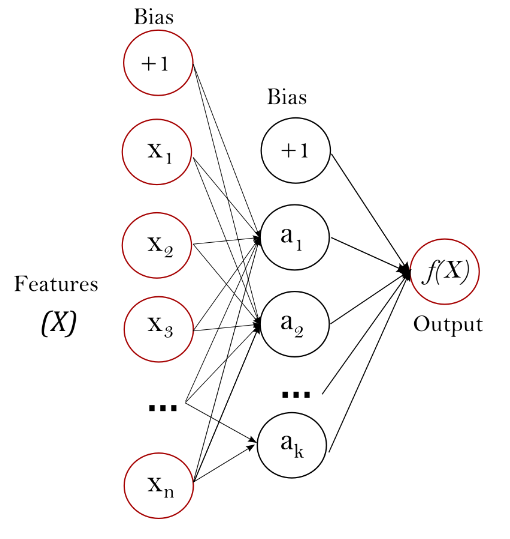

hidden_layer_sizes=(100,),max_iter=600 are the parameter of the Multilayer perceptron neural network.As we know that the input contain 20 attribute, which means there will be 20 input neurons and one bias for the input layers so the we need much more than 20 neurons in hidden layer in order to storage as much as information from the input and represent the ADJ Close value as output data.

In [15]:
y_pred_mlp=mlp.predict(X_test)

In [16]:
# Compute R^2 and root mean squared error
print("Accuracy={}".format(mlp.score(X_test,y_test)))
rmse_mlp=np.sqrt(mean_squared_error(y_test,y_pred_mlp))
print("Root mean squared error={}".format(rmse_mlp))

Accuracy=0.992025919126
Root mean squared error=1.92754483601


In [17]:
y_test_pred_mlp=pd.DataFrame({'y_test':y_test,'y_pred_mlp':y_pred_mlp},index=X_test.index)

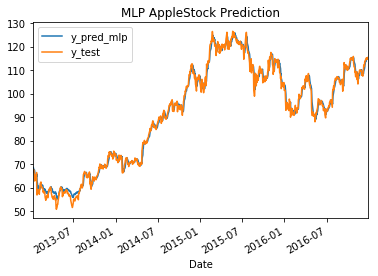

In [18]:
y_test_pred_mlp.plot(legend=True)
plt.title('MLP AppleStock Prediction')
plt.show()

### （2 year data）ALIBABA Close price prediction & （5 year data）Boeing Close price prediction
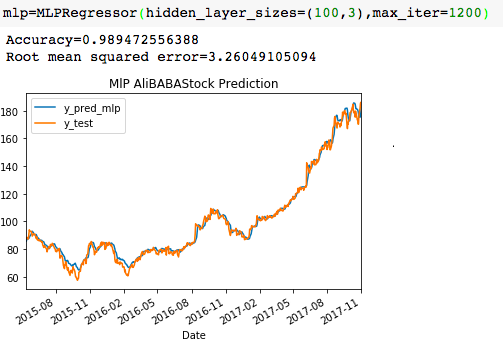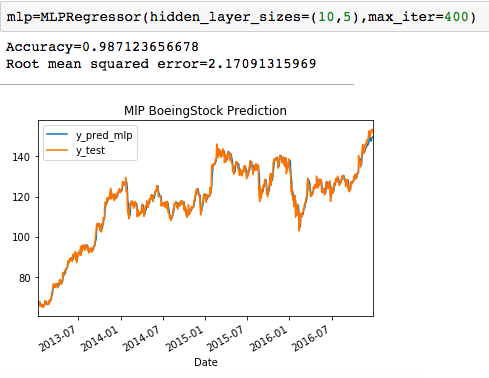

## Discussion 
The picture presented above are the predicted output and the original test data for three different companies.
Alibaba's histrical price just contians 600 samples, so the gap between predicted output and the original test data is much more evident than the other two companies. Because as we train the MLP model ， the parameter updating determined by the sample this model have trained， So as the train data is not enough， the parameter can not update in order to get satisfied weights through the backpropagation algorithm which means the loss is not small enough. So, if we want to get the perfect data we need a large train dataset with a large hidden layer in order to get a low enough loss and avoid the overfitting problem.

In [19]:
# build linear regression model 
reg=LinearRegression()

In [20]:
reg.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# algorithm : MLP regression
Linear regression is  very simple approach for supervised learning. Though it may seem somewaht dull compared to some of the more modern algorithms,linear regression is still a useful and widely sued statistical learning method. Linear regression is used to predict a quantitative response Y from the predictor variable X which in our model X is equal to the ADJ Close value which we need the model to predicted. Linear Regression is made with an assumption that there's a linear relationship between X and Y.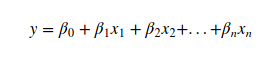

y is the output, x1 , x2 , ... . xn are the attribute from train data.

In [21]:
y_pred_reg=reg.predict(X_test)
len(y_pred_reg)

1001

In [22]:

# Compute R^2 and root mean squared error
print("R^2={}".format(reg.score(X_test,y_test)))
len(y_pred_reg)
len(y_test)

R^2=0.995508261551


1001

In [23]:
rmse_reg=np.sqrt(mean_squared_error(y_test,y_pred_reg))
print("Root mean squared error={}".format(rmse_reg))

Root mean squared error=1.44667641289


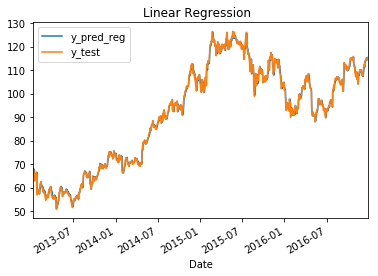

In [24]:
y_test_pred_reg=pd.DataFrame({'y_test':y_test,'y_pred_reg':y_pred_reg},index=X_test.index)
y_test_pred_reg.plot(legend=True)
plt.title("Linear Regression  ")
plt.show()

### （2 year data）ALIBABA Close price prediction & （5 year data）Boeing Close price prediction
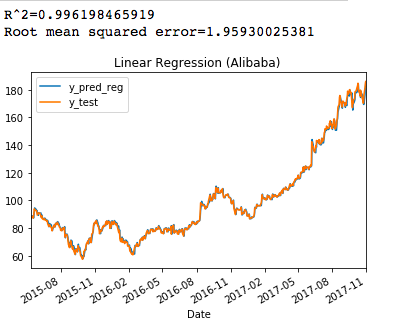
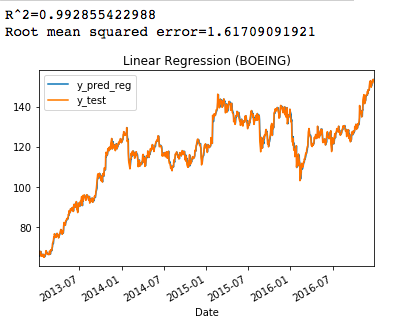

## Discussion 
The picture presented above are the predicted output and the original test data for three different companies. Compare with the visualize result from the MLP regression, the volumn of train sample did not have a signficant influence as it did in the MLP regression. The prediction for all companies is precise enough for practice

## Problem 
However, there is a problem for this prediction code, that is the preprocessing for the whole data, in this case, both linear regression model and the MLP regression can not storage the data for the last input which means it's output just depend on the attribute for that data, And there are five attribute value are calculate from the ADJ Close value, That mean if we want to product the exact ADJ close value, We have to already know the value of ADJ Close for the day we want to predict. In this case, using MLP regression and Linear regression is not making sense. So 
We try the other model which learning the data correspond with time.
 
 # LSTM (PART 2)
